<h1 align=center><font size = 5>Peer-graded Assignment: Build a Regression Model in Keras</font></h1>

# Introduction
This notebook covers the peer-graded assignment: "Build a Regression Model in Keras" which concludes the course "Introduction to Deep Learning & Neural Networks with Keras". 

# Objectives
## A. Build a baseline model
Use the Keras library to build a neural network with the following:
- One hidden layer of 10 nodes, and a ReLU activation function
- Use the adam optimizer and the mean squared error  as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.
2. Train the model on the training data using 50 epochs.
3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.
4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.
5. Report the mean and the standard deviation of the mean squared errors.

## B. Normalize the data
Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

## C. Increase the number of epochs
Repeat Part B but use 100 epochs this time for training.
How does the mean of the mean squared errors compare to that from Step B?

## D. Increase the number of hidden layers
Repeat part B but use a neural network with the following instead:
- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

# Table of content

# Concrete compressive strength regression model

## Init

In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Load and prepare data

### Get dataset

In [49]:
# Get Data
concrete_data = pd.read_csv('https://cocl.us/concrete_data')

### Data structure

In [50]:
# Data preview
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [51]:
# Datapoints
concrete_data.shape

(1030, 9)

The concrete dataset consists of 1030 rows with 9 columns.

Predictors
- Cement
- Blast Furnace Slag
- Fly Ash
- Water
- Superplasticizer
- Coarse Aggregate
- Fine Aggregate
- Age

Target
- Strength

### Check and cleanup

#### Data Statistics

In [52]:
# Data statistics
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Check for null values

In [53]:
# null values
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Data looks clean so far. The only thing we need to consider is not to overfit the model due to the low number of samples.

### Predictors and target split
The target in this model is the strength. All other columns are predictors.

In [54]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # predictors
target = concrete_data['Strength'] # target

### Sanity check

In [55]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [56]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Preserve the number of predictor columns to n_cols for use as size of the input shape in the neural network layer

In [57]:
n_cols = predictors_norm.shape[1] # number of predictor columns

## A. Build a baseline model
Using the Keras library to build a neural network with the following:
- One hidden layer of 10 nodes, and a ReLU activation function
- Use the adam optimizer and the mean squared error as the loss function.

In [58]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,))) # One hidden layer of 10 nodes, and a ReLU activation function
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error') # adam optimizer and the mean squared error  as the loss function
    return model

### Train and test the model
- Randomly split the data into a training and test sets by holding 30% of the data for testing using the __[train_test_split helper function from Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)__.
- Train the model on the training data using 50 epochs.

#### Build and train the model

##### Build model

In [59]:
# build the model
model = regression_model()

##### Train/test split

In [60]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    predictors, target, test_size=0.3, random_state=42
)

##### Fit/train model

In [ ]:
# fit the model
# verbose is set to 0 for clarity, increase if needed
model.fit(X_train, y_train, epochs=50, verbose=0) # train with training dataset and 50 epochs
print("Training of model complete")

##### Evaluate model

In [62]:
mse = mean_squared_error(y_test, model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 132.0647


##### Repeat train and evaluation 50 times

In [95]:
# Train and evaluate 50 times and calculate mean and standard deviation of the mean squared errors

# mean squared errors
mses_50 = np.array([])

# build the model
model_50 = regression_model()

for i in range(50):
    # train/test split
    X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(
        predictors, target, test_size=0.3, random_state=42
    )

    # fit the model
    # verbose is set to 0 for clarity, increase if needed
    model_50.fit(X_train_50, y_train_50, epochs=50, verbose=0) # train with training dataset and 50 epochs
    # evaluate the model
    mse_50 = mean_squared_error(y_test_50, model_50.predict(X_test_50))
    mses_50 = np.append(mses_50, mse_50, axis=None)
    print("Iteration " + str(i) + " of 50 training and evaluation of model complete. MSE is : {:.4f}".format(mse_50))  
    
model_50_mse_mean = np.mean(mses_50, axis=0)
model_50_mse_std = np.std(mses_50, axis=0)

print("\n")
print("The mean deviation of the mean squared error (MSE) on regular test set: {:.4f}".format(model_50_mse_mean))
print("The standard deviation of the mean squared error (MSE) on regular test set: {:.4f}".format(model_50_mse_std))

Iteration 0 of 50 training and evaluation of model complete. MSE is : 360.7322
Iteration 1 of 50 training and evaluation of model complete. MSE is : 215.0549
Iteration 2 of 50 training and evaluation of model complete. MSE is : 115.9369
Iteration 3 of 50 training and evaluation of model complete. MSE is : 105.7146
Iteration 4 of 50 training and evaluation of model complete. MSE is : 93.3352
Iteration 5 of 50 training and evaluation of model complete. MSE is : 77.2554
Iteration 6 of 50 training and evaluation of model complete. MSE is : 73.6073
Iteration 7 of 50 training and evaluation of model complete. MSE is : 63.7943
Iteration 8 of 50 training and evaluation of model complete. MSE is : 59.3842
Iteration 9 of 50 training and evaluation of model complete. MSE is : 54.3010
Iteration 10 of 50 training and evaluation of model complete. MSE is : 50.6710
Iteration 11 of 50 training and evaluation of model complete. MSE is : 50.4822
Iteration 12 of 50 training and evaluation of model comple

## B. Normalize the data
Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

In [80]:
# Normalize the data
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


### Train and evaluation 50 times with normalized data

In [96]:
# build the model
model_50_norm = regression_model()

# Train and evaluate 50 times and calculate mean and standard deviation of the mean squared errors

# mean squared errors
mses_50_norm = np.array([])

for i in range(50):
    # train/test split
    X_train_50_norm, X_test_50_norm, y_train_50, y_test_50 = train_test_split(
        predictors_norm, target, test_size=0.3, random_state=42
    )

    # fit the model
    # verbose is set to 0 for clarity, increase if needed
    model_50_norm.fit(X_train_50_norm, y_train_50, epochs=50, verbose=0) # train with normalized training dataset and 50 epochs
    # evaluate the model
    mse_50_norm = mean_squared_error(y_test_50, model_50_norm.predict(X_test_50_norm))
    mses_50_norm = np.append(mses_50_norm, mse_50_norm, axis=None)
    print("Iteration " + str(i) + " of 50 training and evaluation of model complete. MSE is : {:.4f}".format(mse_50_norm))  

model_50_norm_mse_mean = np.mean(mses_50_norm, axis=0)
model_50_norm_mse_std = np.std(mses_50_norm, axis=0)
    
print("\n")
print("The mean deviation of the mean squared error (MSE) on normalized test set: {:.4f}".format(model_50_norm_mse_mean))
print("The standard deviation of the mean squared error (MSE) on normalized test set: {:.4f}".format(model_50_norm_mse_std))

Iteration 0 of 50 training and evaluation of model complete. MSE is : 296.4710
Iteration 1 of 50 training and evaluation of model complete. MSE is : 143.9757
Iteration 2 of 50 training and evaluation of model complete. MSE is : 112.2412
Iteration 3 of 50 training and evaluation of model complete. MSE is : 85.5686
Iteration 4 of 50 training and evaluation of model complete. MSE is : 70.0467
Iteration 5 of 50 training and evaluation of model complete. MSE is : 60.6767
Iteration 6 of 50 training and evaluation of model complete. MSE is : 53.4206
Iteration 7 of 50 training and evaluation of model complete. MSE is : 49.8290
Iteration 8 of 50 training and evaluation of model complete. MSE is : 47.1532
Iteration 9 of 50 training and evaluation of model complete. MSE is : 45.4626
Iteration 10 of 50 training and evaluation of model complete. MSE is : 43.8813
Iteration 11 of 50 training and evaluation of model complete. MSE is : 43.1957
Iteration 12 of 50 training and evaluation of model complet

#### Compare the mean of the mean squared errors between A and B
> The mean deviation of the mean squared error (MSE) on regular test set: {{model_50_mse_mean}}

> The mean deviation of the mean squared error (MSE) on normalized test set: {{model_50_norm_mse_mean}}


When comparing A and B we observe the following
- the mean of the mean squared errors with normalized data in B is lower then in A (regular data)
- generally the mean squared errors decrease with more training iterations
- While the decrease of MSE in B looks continuous and smooth, the decrease in A shows some outliers

This means that with normalized data we observe more accurate predictions.

As we know some machine learning algorithms benefit from normalization, e.g. KNN, Logistic Regression, K-Means and Neural Networks. 
That agrees with our above observations.

#### Compare the decrease of mean squared errors between regular and normalized data

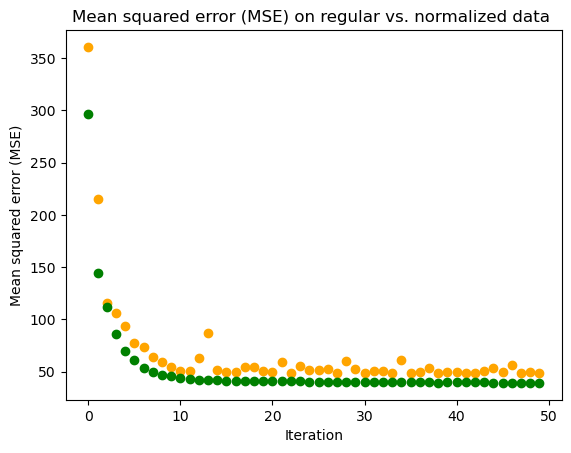

In [97]:
# Plott MSE for regular vs. normalized data

regular_MSEs = mses_50
normalized_MSEs = mses_50_norm
iterations = np.arange(50)

plt.title("Mean squared error (MSE) on regular vs. normalized data ")
plt.xlabel("Iteration")
plt.ylabel("Mean squared error (MSE)")

plt.scatter(iterations, regular_MSEs, color="orange",)
plt.scatter(iterations, normalized_MSEs, color="green",)
plt.show()

## C. Increase the number of epochs
Repeat Part B but use 100 epochs this time for training. How does the mean of the mean squared errors compare to that from Step B?

### Train and evaluation 50 times with 100 epochs each on normalized data

In [98]:
# build the model
model_100_norm = regression_model()

# Train and evaluate 50 times and calculate mean and standard deviation of the mean squared errors

# mean squared errors
mses_100_norm = np.array([])

for i in range(50):
    # train/test split
    X_train_100_norm, X_test_100_norm, y_train_100, y_test_100 = train_test_split(
        predictors_norm, target, test_size=0.3, random_state=42
    )

    # fit the model
    # verbose is set to 0 for clarity, increase if needed
    model_100_norm.fit(X_train_100_norm, y_train_100, epochs=100, verbose=0) # train with normalized training dataset and 50 epochs
    # evaluate the model
    mse_100_norm = mean_squared_error(y_test_100, model_100_norm.predict(X_test_100_norm))
    mses_100_norm = np.append(mses_100_norm, mse_100_norm, axis=None)
    print("Iteration " + str(i) + " of 50 training and evaluation of model complete. MSE is : {:.4f}".format(mse_100_norm))  

model_100_norm_mse_mean = np.mean(mses_50_norm, axis=0)
model_100_norm_mse_std = np.std(mses_50_norm, axis=0)
    
print("\n")
print("The mean deviation of the mean squared error (MSE) on normalized test set with 100 epochs: {:.4f}".format(model_100_norm_mse_mean))
print("The standard deviation of the mean squared error (MSE) on normalized test set with 100 epochs: {:.4f}".format(model_100_norm_mse_std))

Iteration 0 of 50 training and evaluation of model complete. MSE is : 146.9928
Iteration 1 of 50 training and evaluation of model complete. MSE is : 95.7709
Iteration 2 of 50 training and evaluation of model complete. MSE is : 79.3046
Iteration 3 of 50 training and evaluation of model complete. MSE is : 74.4987
Iteration 4 of 50 training and evaluation of model complete. MSE is : 72.8882
Iteration 5 of 50 training and evaluation of model complete. MSE is : 70.7704
Iteration 6 of 50 training and evaluation of model complete. MSE is : 69.7539
Iteration 7 of 50 training and evaluation of model complete. MSE is : 68.0395
Iteration 8 of 50 training and evaluation of model complete. MSE is : 66.3960
Iteration 9 of 50 training and evaluation of model complete. MSE is : 64.3643
Iteration 10 of 50 training and evaluation of model complete. MSE is : 57.6782
Iteration 11 of 50 training and evaluation of model complete. MSE is : 52.5667
Iteration 12 of 50 training and evaluation of model complete.

In [ ]:
#### Compare the mean of the mean squared errors between B and C
> The mean deviation of the mean squared error (MSE) on normalized test set: {{model_50_norm_mse_mean}}

> 

After x iterations 


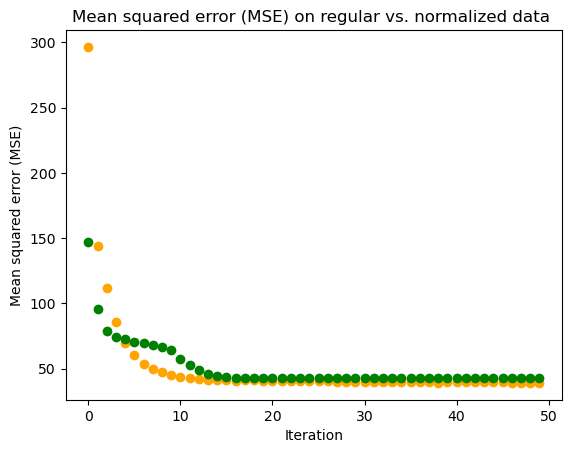

In [100]:
# Plott MSE for 50 vs. 100 epoch training

epoch_50_MSEs = mses_50_norm
epoch_100_MSEs = mses_100_norm
iterations = np.arange(50)

plt.title("Mean squared error (MSE) on regular vs. normalized data ")
plt.xlabel("Iteration")
plt.ylabel("Mean squared error (MSE)")

plt.scatter(iterations, epoch_50_MSEs, color="orange",)
plt.scatter(iterations, epoch_100_MSEs, color="green",)
plt.show()